My solution to the coding challenge for my application to the MAIS 202 course
in the Winter 2019 semester. It involves using Python dictionaries to store and
manipulate the data. This was done to emulate a hash table, so that data could 
be accessed in constant time. I put both a Python script and a Python notebook
in the repository, which both represent the same solution and will both produce 
the same output.

In [1]:
import pandas as pd

data = pd.read_csv("data.csv")

In [2]:
int_rates = data.iloc[:,5] #The interest rates are located in the 5th column of the data file (counting from 0)
purposes = data.iloc[:,16] #Purposes are located in the 16th column

In [3]:
dict = {} #Initializing a new dictionary
for i in purposes: 
    dict[i] = [0,0,0] #Each purpose will map to a list of 3 values

In [4]:
counter = 0

for i in purposes:
    dict[i][1] += int_rates[counter] #A running total of interest rates for each purpose
    dict[i][2] += 1 #Counting the number of instances of each purpose
    counter += 1

In [5]:
for i in dict:
    dict[i][0] = dict[i][1]/dict[i][2] #Computing the average interest rate for each purpose

In [6]:
#Sorting averages in decreasing order
sorted_averages = sorted(dict.items(), key=lambda x: x[1], reverse=True) 

In [7]:
counter = 0
x = [] #The list of purposes
y = [] #The list of corresponding averages

#Printing the averages in order
for i in sorted_averages:
    x.append(sorted_averages[counter][0]) 
    y.append(sorted_averages[counter][1][0])
    counter += 1

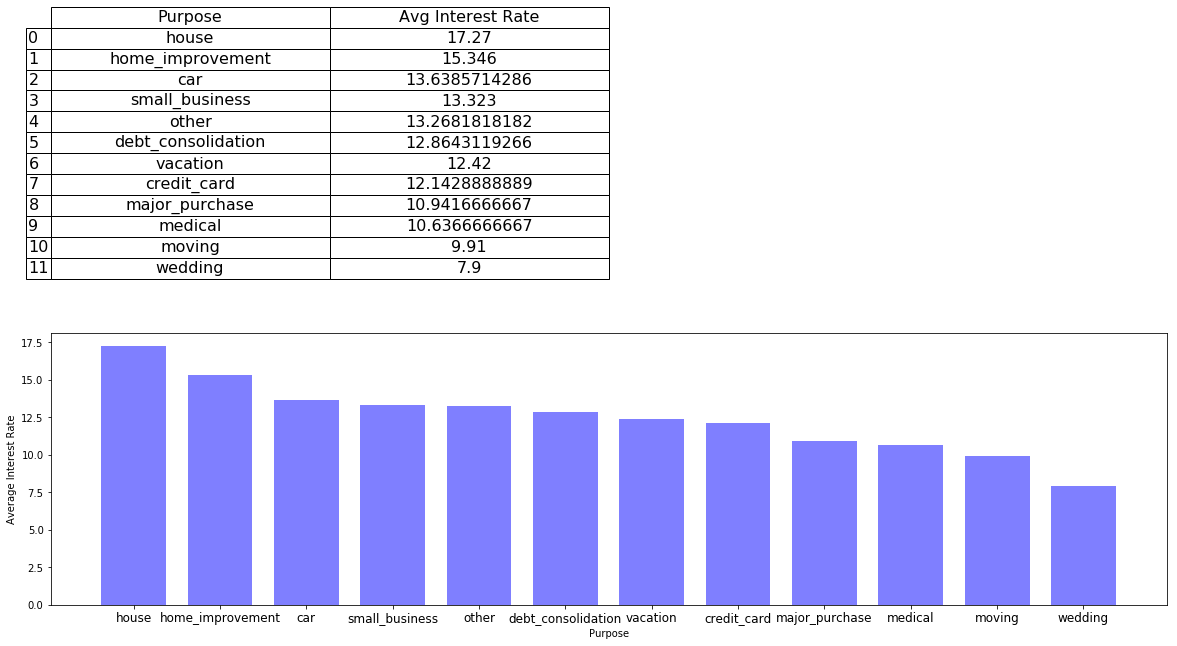

In [8]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.subplots(figsize=(20,5))
pos = np.arange(0,len(x)*4,4)

#Plotting the graph
plt.bar(pos, y, width=3, align = "center", alpha=0.5, color = "blue")

plt.xlabel("Purpose")
plt.ylabel("Average Interest Rate")
plt.xticks(pos, x, fontsize=12)


rows = np.arange(len(x))
matrix = [[x[i],y[i]] for i in range(len(x))]

#Plotting the table on top of the graph
t = plt.table(cellText=matrix, rowLabels=rows, colLabels=("Purpose", "Avg Interest Rate"), 
          bbox=[0.0,1.2,0.5,1.0], cellLoc="center")

t.set_fontsize(16)

plt.show()